In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\asus\AppData\Local\Temp\ipykernel_12616\947282433.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("G:\CovidDataset\Data\covid-data(cleaned).csv")


In [3]:
top_cases = df.groupby('country')['total_cases'].max().sort_values(ascending=False).reset_index()
top_deaths = df.groupby('country')['total_deaths'].max().sort_values(ascending=False).reset_index()

In [5]:
countries_by_deaths = (pd.merge(top_cases, top_deaths, on='country', how='outer')
                    .sort_values('total_deaths', ascending=False).reset_index(drop=True))

In [6]:
countries_by_deaths

,country,total_cases,total_deaths
0,United States,103436829,1193165.0
1,Brazil,37511921,702116.0
2,India,45041748,533623.0
3,Russia,24268728,403188.0
4,Mexico,7619458,334551.0
...,...,...,...
226,Falkland Islands,1923,0.0
227,Turkmenistan,0,0.0
228,Niue,1074,0.0
229,Saint Helena,2166,0.0


In [7]:
countries_by_case = countries_by_deaths.sort_values('total_cases', ascending=False).reset_index(drop=True)

In [8]:
for country, cases in top_cases.items():
    print(f"{country}: {cases}")

United States: 103436829
China: 99373219
India: 45041748
Brazil: 37511921
South Korea: 34571873
Japan: 33803572
Italy: 26781078
United Kingdom: 24974629
Russia: 24268728
Turkey: 17004718
Oceania: 15003352
Australia: 11861161
Vietnam: 11624000
Argentina: 10101218
Netherlands: 8640008
Iran: 7627863
Mexico: 7619458
Indonesia: 6829399
Poland: 6670799
Colombia: 6391876
Austria: 6082444
Greece: 5673681
Portugal: 5664109
Ukraine: 5532777
Chile: 5401126
Malaysia: 5309410
Belgium: 4872829
Israel: 4841558
Canada: 4819055
Thailand: 4799180
Czechia: 4761919
Peru: 4526977
Switzerland: 4457868
Philippines: 4173631
South Africa: 4072765
Romania: 3541619
Denmark: 3435679
Singapore: 3006155
Sweden: 2755181
New Zealand: 2639048
Serbia: 2583470
Iraq: 2465545
Hungary: 2230800
Bangladesh: 2051348
Slovakia: 1878002
Georgia: 1863615
Jordan: 1746997
Ireland: 1745088
Pakistan: 1580631
Norway: 1512647
Kazakhstan: 1504370
Finland: 1499712
Lithuania: 1369355
Slovenia: 1356582
Bulgaria: 1329988
Croatia: 1317144
Mo

In [9]:
top_deaths

country
United States       1193165.0
Brazil               702116.0
India                533623.0
Russia               403188.0
Mexico               334551.0
                      ...    
Falkland Islands          0.0
Turkmenistan              0.0
Niue                      0.0
Saint Helena              0.0
North Korea               0.0
Name: total_deaths, Length: 231, dtype: float64

In [11]:
df['death_rate'] = df['total_deaths'] / df['total_cases']
df['death_rate_percent'] = df['death_rate'] * 100

In [12]:
df

,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,population,population_density,death_rate,death_rate_percent
0,Asia,Afghanistan,2020-01-05,0,0.0,0.0,0.0,41128772,54.42,NaN,NaN
1,Asia,Afghanistan,2020-01-06,0,0.0,0.0,0.0,41128772,54.42,NaN,NaN
2,Asia,Afghanistan,2020-01-07,0,0.0,0.0,0.0,41128772,54.42,NaN,NaN
3,Asia,Afghanistan,2020-01-08,0,0.0,0.0,0.0,41128772,54.42,NaN,NaN
4,Asia,Afghanistan,2020-01-09,0,0.0,0.0,0.0,41128772,54.42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
386689,Africa,Zimbabwe,2024-07-31,266386,0.0,5740.0,0.0,16320539,42.73,0.021548,2.154768
386690,Africa,Zimbabwe,2024-08-01,266386,0.0,5740.0,0.0,16320539,42.73,0.021548,2.154768
386691,Africa,Zimbabwe,2024-08-02,266386,0.0,5740.0,0.0,16320539,42.73,0.021548,2.154768
386692,Africa,Zimbabwe,2024-08-03,266386,0.0,5740.0,0.0,16320539,42.73,0.021548,2.154768


In [13]:
countries_by_deaths

,country,total_cases,total_deaths
0,United States,103436829,1193165.0
1,Brazil,37511921,702116.0
2,India,45041748,533623.0
3,Russia,24268728,403188.0
4,Mexico,7619458,334551.0
...,...,...,...
226,Falkland Islands,1923,0.0
227,Turkmenistan,0,0.0
228,Niue,1074,0.0
229,Saint Helena,2166,0.0


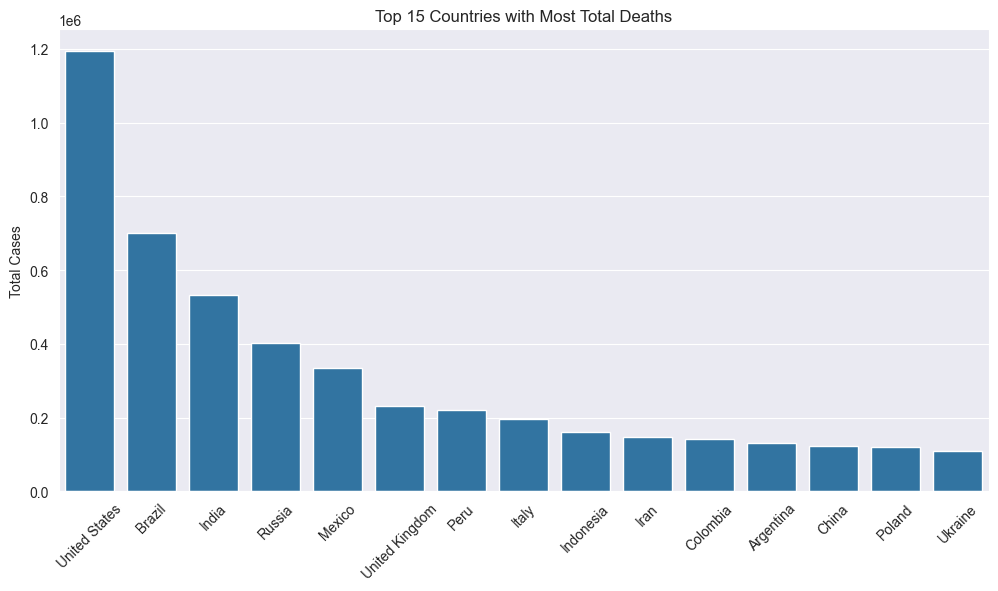

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=countries_by_deaths.loc[:14, "country"].values, y=countries_by_deaths.loc[:14 , "total_deaths"].values)
plt.title("Top 15 Countries with Most Total Deaths")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()

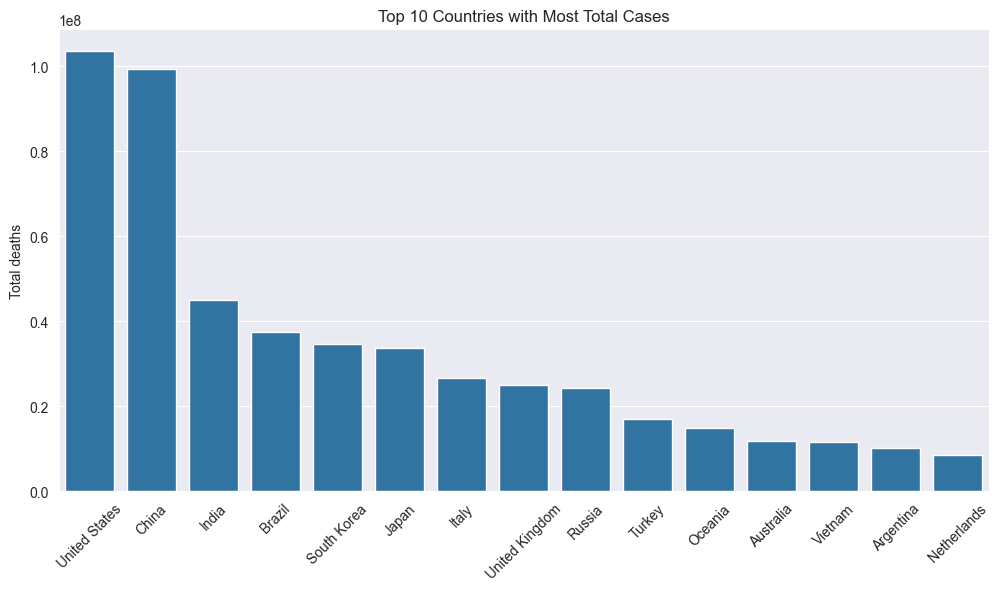

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=countries_by_case.loc[:14, "country"].values , y=countries_by_case.loc[:14 , "total_cases"].values)
plt.title("Top 10 Countries with Most Total Cases")
plt.ylabel("Total deaths")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='date', ylabel='new_cases'>

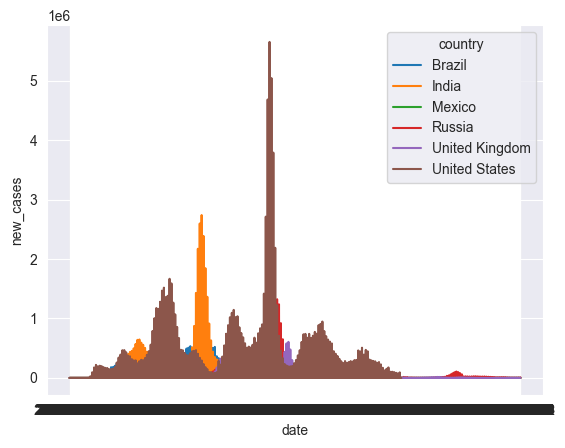

In [16]:
countries = countries_by_deaths.loc[:5, "country"].values
df_filtered = df[df['country'].isin(countries)]

sns.lineplot(data=df_filtered, x='date', y='new_cases', hue='country')

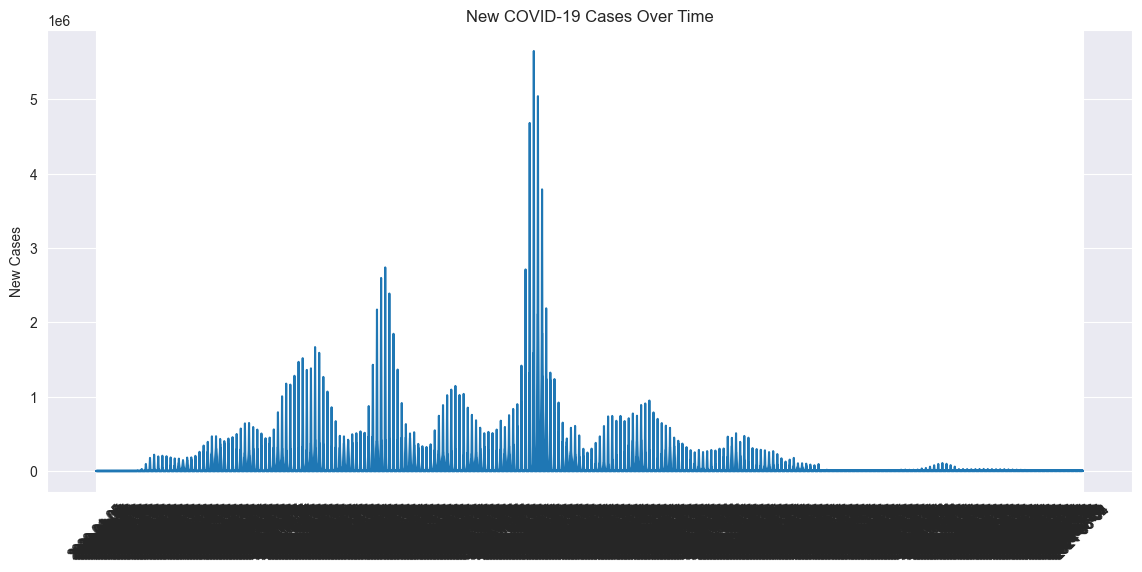

In [17]:
countries = countries_by_deaths.loc[:5, "country"].values
df_countries = df[df['country'].isin(countries)]

plt.figure(figsize=(14, 6))
plt.plot(df_countries['date'], df_countries['new_cases'])
plt.title("New COVID-19 Cases Over Time")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.show()
